In [170]:
%matplotlib inline
import numpy as np
import openmc

In [171]:
#"vacuum"
vac = openmc.Material(10, "H1")
vac.add_nuclide('H1',1.0)
vac.set_density('g/cm3',0.000001)
print(vac)

Material
	ID             =	10
	Name           =	H1
	Temperature    =	None
	Density        =	1e-06 [g/cm3]
	S(a,b) Tables  
	Nuclides       
	H1             =	1.0          [ao]



/home/james/anaconda3/lib/python3.6/site-packages/openmc/mixin.py:61: IDWarning: Another Material instance already exists with id=10.
  warn(msg, IDWarning)


In [198]:
origin_x = 0
origin_y = 0
origin_z = 1
r = 1.5
h=1
Ap = -h**2 / r**2
low = openmc.ZPlane(z0=0)
high = openmc.ZPlane(z0=1)
cone = openmc.Quadric(a=Ap,b=Ap, c=1, 
                      g=-2*origin_x, h=-2*origin_y,j=-2*origin_z,
                      k=-origin_x**2-origin_y**2+origin_z**2,
                      boundary_type='transmission')

In [199]:
region = +low & -high & -cone

In [200]:
v = openmc.Cell(100, 'vacuum')
v.fill = vac
v.region = region

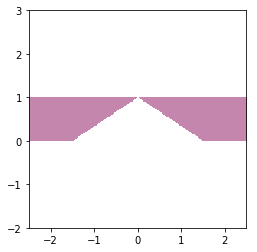

In [201]:
uni = openmc.Universe(cells=[v])
uni.plot(width=(5,5), origin=(0,0,.5), basis='xz')

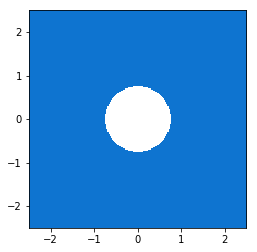

In [202]:
uni = openmc.Universe(cells=[v])
uni.plot(width=(5,5), origin=(0,0,.5), basis='xy')